<a href="https://colab.research.google.com/github/EfrainHernandezCortes/EDP2/blob/main/M%C3%A9todo_M%C3%ADnimos_Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método de Mínimos Cuadrados.

In [32]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

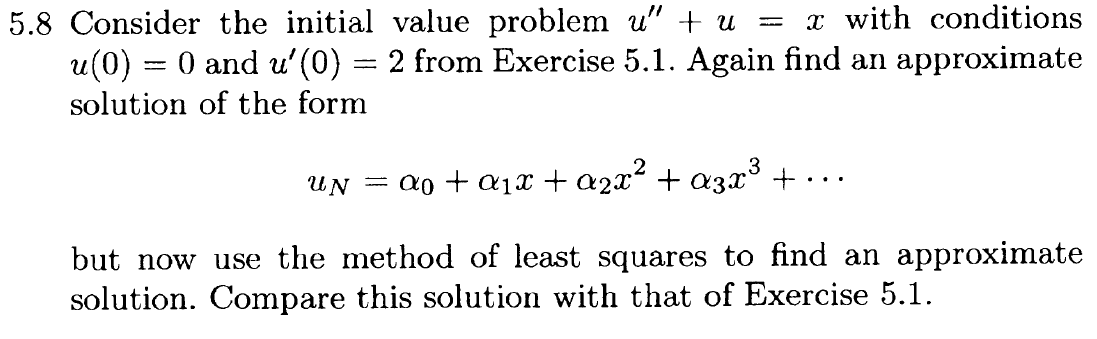

In [33]:
x, a, b = sp.symbols('x a b') #introducimos variables
u = sp.Function('u') #Introducimos función

Para resolver la ecuación:

In [34]:
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Condiciones inciales

In [35]:
sol=sp.dsolve(ode,ics={u(0):0, u(x).diff(x).subs(x,0):2})

In [36]:
sol

Eq(u(x), x + sin(x))

In [37]:
u_expr = sol.rhs #parte derecha de sol

u_num = sp.lambdify(x, u_expr, "numpy") #Se define como arreglo

xx = np.linspace(0, 1, 100)
yy = u_num(xx)

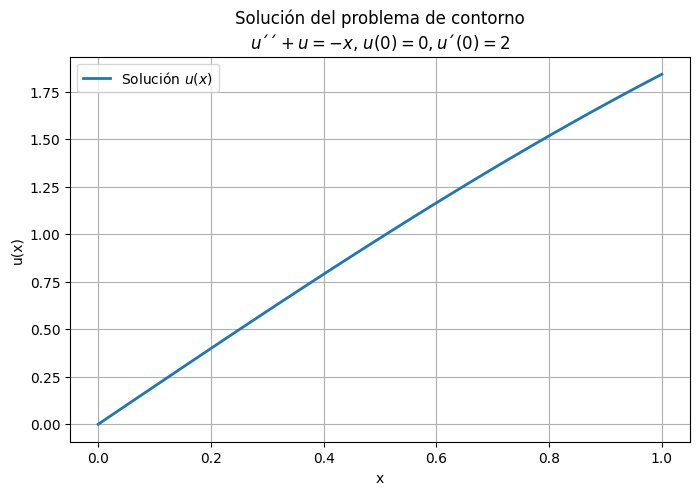

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n$u´´ + u = -x$, $u(0)=0, u´(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

Se propone la función de prueba:

In [39]:
u_n = 2*x+a*x**2+b*x**3

In [40]:
u_n

a*x**2 + b*x**3 + 2*x

Y definimos el residuo (o error), E

In [41]:
u_n_2 = sp.diff(u_n, x, 2) #Segunda derivada

#E(x)
E = u_n_2 + u_n - x

In [42]:
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [43]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

Usando las condiciones para los puntos críticos del residuo y resolviendo el sistema de ecuaciones que se obtiene:

In [44]:
#Se tienen las dos derivadas
dIa=sp.diff(E,a)
dIb=sp.diff(E,b)

In [45]:
eq1 = sp.integrate(E*dIa, (x, 0, 1))
eq2 = sp.integrate(E*dIb, (x, 0, 1))

In [46]:
sol = sp.solve((eq1, eq2), [a,b])

In [47]:
sol

{a: -1335/86789, b: -24759/173578}

In [48]:
alpha_2_val = sol[a]
alpha_3_val = sol[b]

In [49]:
u_approx_expr = u_n.subs({a: alpha_2_val, b: alpha_3_val})

Gráficas

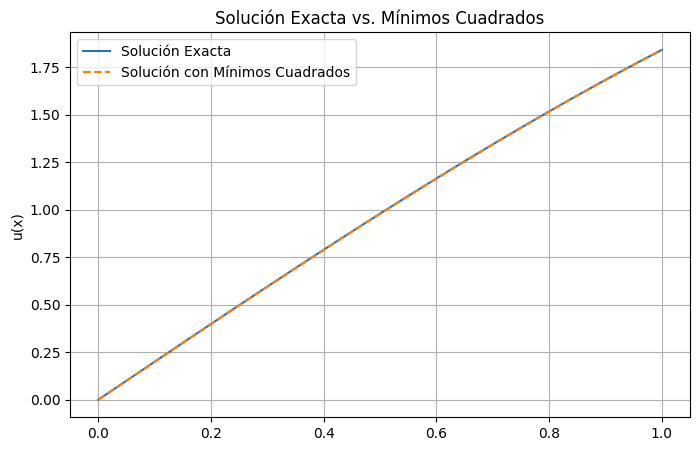

In [50]:
u_exacta_expr = x + sp.sin(x) #Solución analítica

u_aprox_num = sp.lambdify(x, u_approx_expr, 'numpy')
u_exacta_num = sp.lambdify(x, u_exacta_expr, 'numpy')
xx = np.linspace(0, 1, 100)
yy_aprox = u_aprox_num(xx)
yy_exacta = u_exacta_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy_exacta, label='Solución Exacta')
plt.plot(xx, yy_aprox, label='Solución con Mínimos Cuadrados', linestyle='--')
plt.title('Solución Exacta vs. Mínimos Cuadrados')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

Gráfica del error de la aproximación que permite visualizar el error del truncamiento.

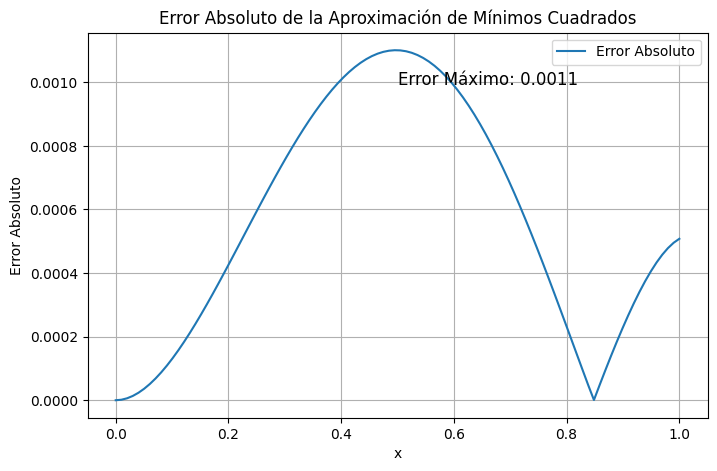

In [51]:
E_abs = np.abs(yy_exacta - yy_aprox)
plt.figure(figsize=(8, 5))
plt.plot(xx, E_abs, label=r'Error Absoluto')
plt.title('Error Absoluto de la Aproximación de Mínimos Cuadrados')
plt.xlabel('x')
plt.ylabel('Error Absoluto')
plt.grid(True)
plt.legend()
error_max = np.max(E_abs)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12)
plt.show()